<a href="https://colab.research.google.com/github/Pasz93/MachineLearning/blob/main/Decision_Tree_Classifier_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = 'https://github.com/daniel-usp/MachineLearning/raw/main/05%20-%20KNN/varejo1.xlsx'

dados = pd.read_excel(url)

dados.head()

,pagamento,solteiro,idade,mulher
0,1,0,20,0
1,1,0,34,1
2,1,0,21,1
3,1,0,22,1
4,1,0,22,1


Melhores parâmetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Melhor score no conjunto de treinamento: 0.8263888888888888
Acurácia no conjunto de teste: 0.8333333333333334


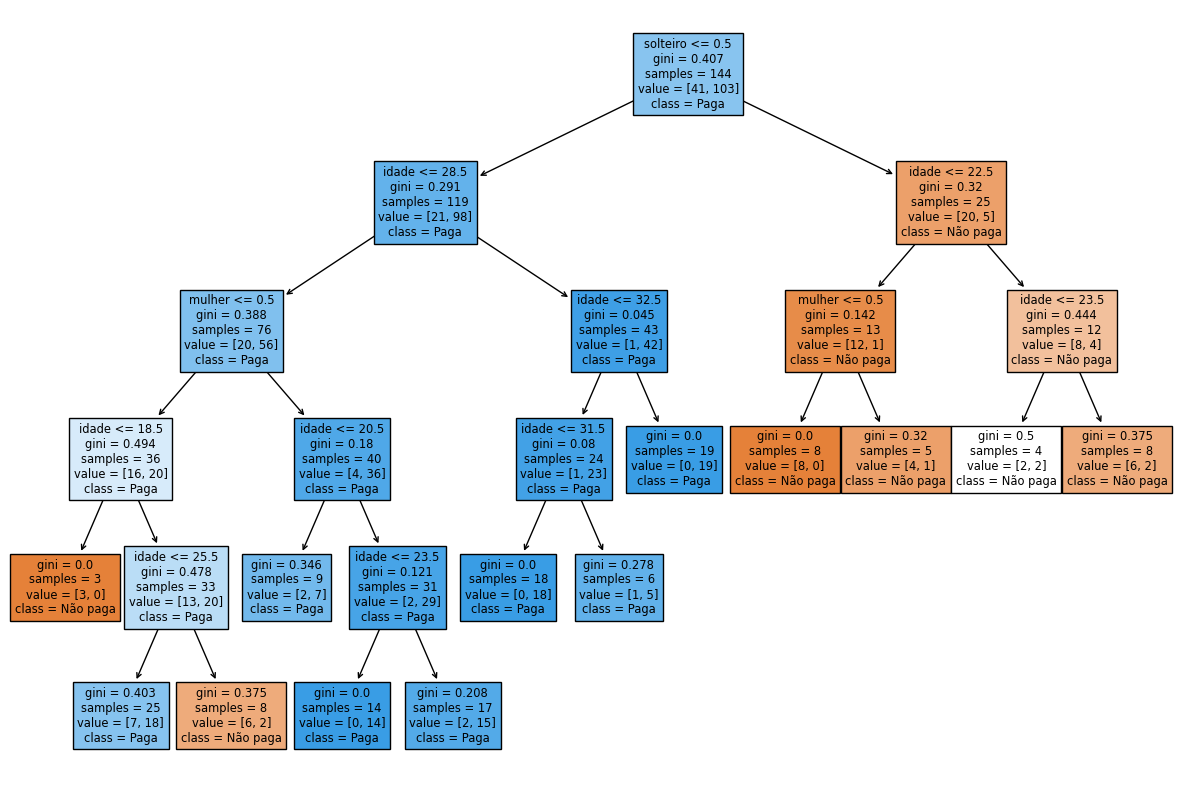

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

url = 'https://github.com/daniel-usp/MachineLearning/raw/main/05%20-%20KNN/varejo1.xlsx'

dados = pd.read_excel(url)

# Changing labels in the target variable
dados['pagamento'] = dados['pagamento'].replace({0: 'Não paga', 1: 'Paga'})

# Separando em variáveis dependentes e independentes
y = dados['pagamento']
x = dados.drop('pagamento', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criando o modelo
dt_classifier = DecisionTreeClassifier()

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando e treinando o GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Melhores parâmetros:", best_params)
print("Melhor score no conjunto de treinamento:", best_score)

# Avaliando o modelo no conjunto de teste
accuracy_test = grid_search.score(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy_test)

# Plotando a árvore de decisão do melhor modelo com class_names
best_dt_model = grid_search.best_estimator_
plt.figure(figsize=(15, 10))
tree.plot_tree(best_dt_model, filled=True, feature_names=X_train.columns, class_names=['Não paga', 'Paga'])
plt.show()
